In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
fashion_train_df= pd.read_csv('Fashion MNIST/fashion-mnist_train.csv')

In [5]:
fashion_test_df = pd.read_csv('Fashion MNIST/fashion-mnist_test.csv')

**VISUALIZATION**

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [11]:
training.shape


(60000, 785)

In [12]:
import random

8.0

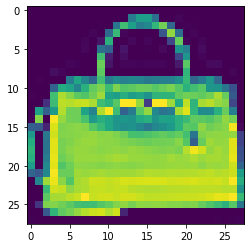

In [13]:
#coloumns are selected from index 1 because label is present at coloumn 0
i = random.randint(0,60001)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0] 
label

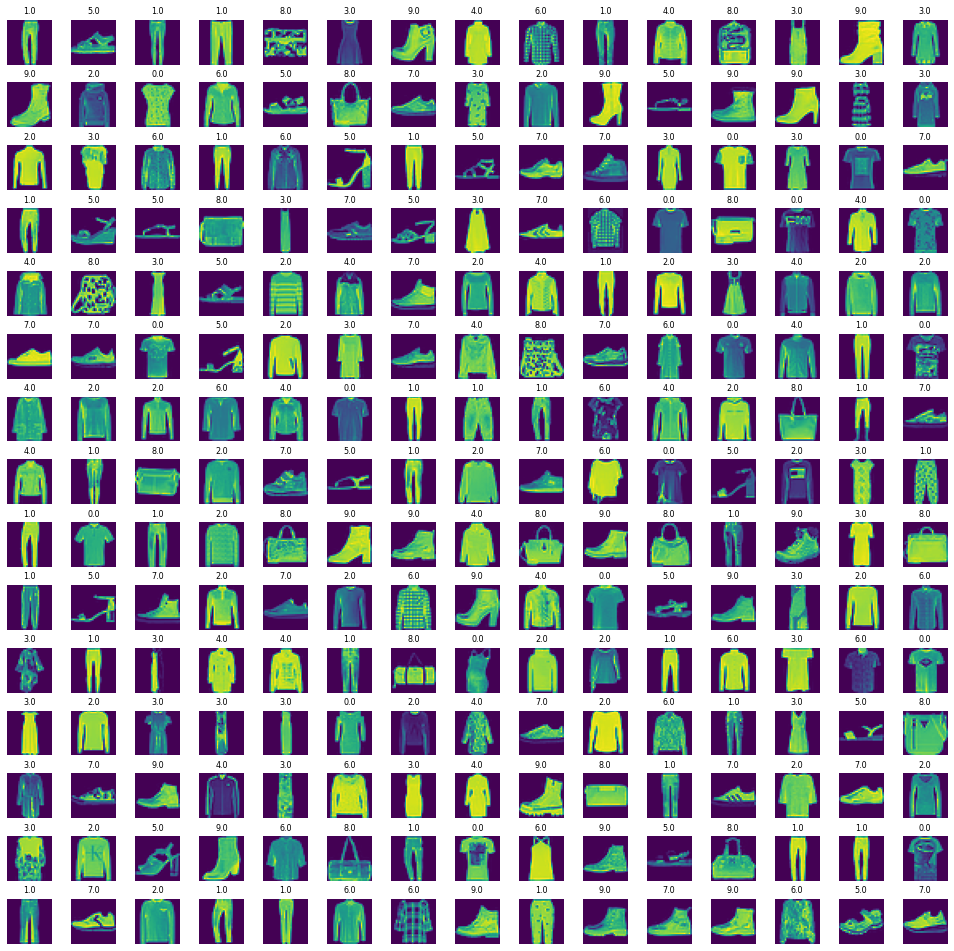

In [14]:
#let us visualize the more images in a grid format
#define the dimensions of the plot grid

W_grid = 15
L_grid = 15

#subplot return the figure object and axes object
#we can use the axes objetc to plot specific figures at various locations

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() #flatten the 15*15 image into 225 array

n_training = len(training) #get the length of the training dataset

#select a randm number from 0 to n_training 

for i in np.arange(0,W_grid*L_grid):
    
    #select the random number 
    index = np.random.randint(0,n_training)
    
   #read and display an image with the selected index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)        

**TRAINING THE DATA**

In [15]:
X_train = training[:,1:]/255
y_train = training[:,0]


In [16]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 


**EVALUATING THE DATA**

In [19]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
X_validate.shape

(12000, 28, 28, 1)

In [23]:
import tensorflow as tf

In [26]:
from tensorflow import keras

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


In [95]:
cnn_model = Sequential()

In [96]:
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))

In [97]:
cnn_model.add(MaxPooling2D(pool_size= (2,2)))

In [98]:
cnn_model.add(Flatten())

In [99]:
cnn_model.add(Dense(32,activation = 'relu'))

In [100]:
cnn_model.add(Dense(10,activation = 'sigmoid'))

In [101]:
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(lr=0.001),metrics= ['accuracy'])

In [102]:
epochs = 50

In [103]:
cnn_model.fit(X_train,y_train,batch_size =512,nb_epoch = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 16s 323us/sample - loss: 1.5335 - accuracy: 0.5018 - val_loss: 0.8346 - val_accuracy: 0.7108
Epoch 2/50
48000/48000 [==============================] - 13s 266us/sample - loss: 0.7289 - accuracy: 0.7396 - val_loss: 0.6592 - val_accuracy: 0.7623
Epoch 3/50
48000/48000 [==============================] - 12s 259us/sample - loss: 0.6275 - accuracy: 0.7768 - val_loss: 0.6040 - val_accuracy: 0.7819
Epoch 4/50
48000/48000 [==============================] - 13s 262us/sample - loss: 0.5800 - accuracy: 0.7930 - val_loss: 0.5647 - val_accuracy: 0.7981
Epoch 5/50
48000/48000 [==============================] - 13s 262us/sample - loss: 0.5495 - accuracy: 0.8038 - val_loss: 0.5543 - val_accuracy: 0.8004
Epoch 6/50
48000/48000 [==============================] - 13s 263us/sample - loss: 0.5312 - accuracy: 0.8077 - val_loss: 0.5268 - val_accuracy: 0.8102
Epoch 7/50
48000/48000 [====================

In [104]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 4s 379us/sample - loss: 0.3714 - accuracy: 0.8630
Test Accuracy : 0.863


In [105]:
predicted_classes = cnn_model.predict_classes(X_test)

In [106]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

We have obtian an Accuracy of 84.92% in training and 85.6% in testing  

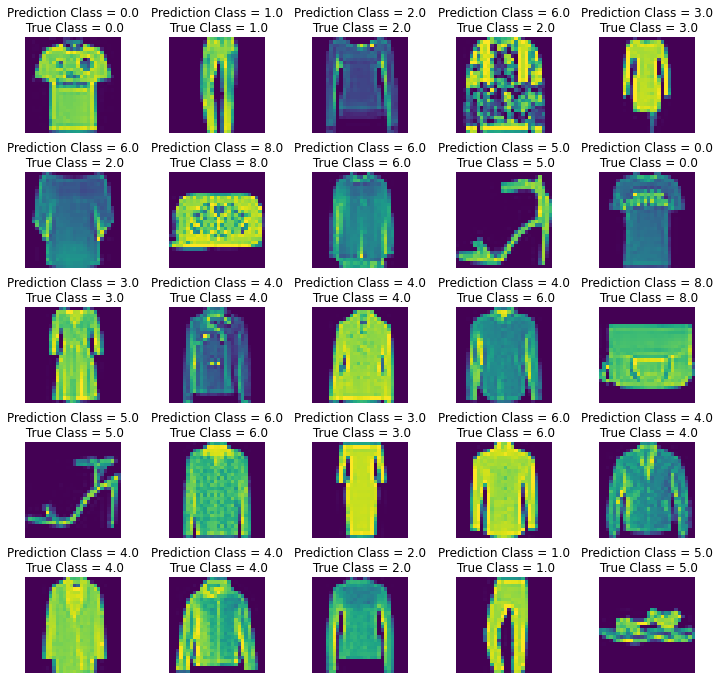

In [107]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)    

We can see here some of the wrong predicted classes

<AxesSubplot:>

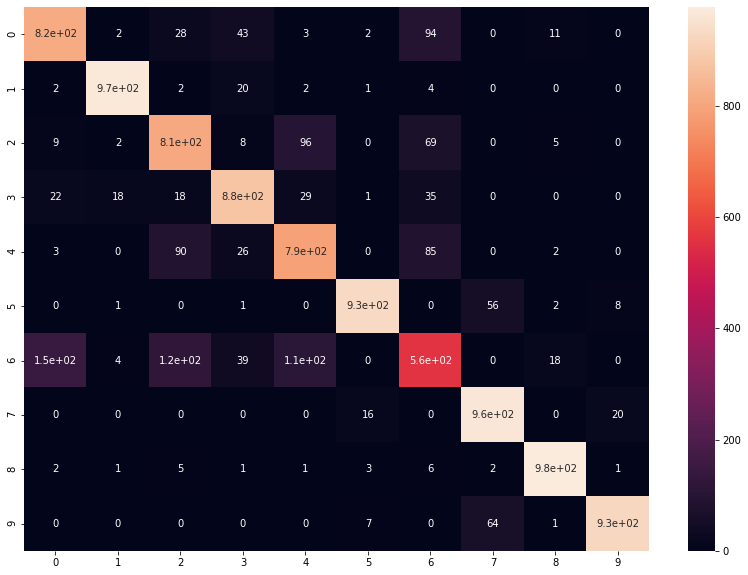

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm,annot=True)
#Sum the diagonal element to get the total true correct values

Here we can see that class 6 and class 4 is very badly predicted

In [109]:
from sklearn.metrics import classification_report 

num_classes = 10

target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names) )

              precision    recall  f1-score   support

     Class 0       0.82      0.82      0.82      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.75      0.81      0.78      1000
     Class 3       0.86      0.88      0.87      1000
     Class 4       0.77      0.79      0.78      1000
     Class 5       0.97      0.93      0.95      1000
     Class 6       0.66      0.56      0.60      1000
     Class 7       0.89      0.96      0.92      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.97      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Class 6 ,Class 4 and Class 2 are classified very badly

In [110]:
#Using 64 kernels insted of 32 and adding one more dense layer to increase the model accuracy

cnn_model_new = Sequential()
cnn_model_new.add(Conv2D(64,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model_new.add(MaxPooling2D(pool_size= (2,2)))
cnn_model_new.add(Flatten())
cnn_model_new.add(Dense(32,activation = 'relu'))
cnn_model_new.add(Dense(10,activation = 'sigmoid'))
cnn_model_new.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(lr=0.001),metrics= ['accuracy'])


In [111]:
epochs = 50

In [112]:
cnn_model_new.fit(X_train,y_train,batch_size = 512,nb_epoch = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 499us/sample - loss: 1.3973 - accuracy: 0.5129 - val_loss: 0.7515 - val_accuracy: 0.7112
Epoch 2/50
48000/48000 [==============================] - 21s 439us/sample - loss: 0.6601 - accuracy: 0.7602 - val_loss: 0.5970 - val_accuracy: 0.7848
Epoch 3/50
48000/48000 [==============================] - 21s 438us/sample - loss: 0.5675 - accuracy: 0.7945 - val_loss: 0.5388 - val_accuracy: 0.8035
Epoch 4/50
48000/48000 [==============================] - 21s 439us/sample - loss: 0.5211 - accuracy: 0.8125 - val_loss: 0.5008 - val_accuracy: 0.8213
Epoch 5/50
48000/48000 [==============================] - 21s 441us/sample - loss: 0.4880 - accuracy: 0.8246 - val_loss: 0.4746 - val_accuracy: 0.8299
Epoch 6/50
48000/48000 [==============================] - 21s 442us/sample - loss: 0.4667 - accuracy: 0.8313 - val_loss: 0.4626 - val_accuracy: 0.8346
Epoch 7/50
48000/48000 [====================

In [113]:
evaluation = cnn_model_new.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 5s 550us/sample - loss: 0.3377 - accuracy: 0.8738
Test Accuracy : 0.874


Training accuracy :88.59%
Test Accuracy : 87.4%

In [114]:
predicted_classes_new = cnn_model_new.predict_classes(X_test)

In [115]:
num_classes = 10

target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes_new, target_names = target_names) )

              precision    recall  f1-score   support

     Class 0       0.82      0.84      0.83      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.83      0.77      0.80      1000
     Class 3       0.87      0.90      0.89      1000
     Class 4       0.76      0.86      0.81      1000
     Class 5       0.95      0.95      0.95      1000
     Class 6       0.70      0.61      0.65      1000
     Class 7       0.95      0.89      0.92      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.92      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

